# Linear Regression Example

Linear regression implementation with TensorFlow v2 library.

This example is using a low-level approach to better understand all mechanics behind the training process.

- Author: Aymeric Damien
- Project: https://github.com/aymericdamien/TensorFlow-Examples/

In [1]:
from __future__ import absolute_import, division, print_function

In [2]:
import tensorflow as tf
import numpy as np
rng = np.random

In [3]:
# Parameters.
learning_rate = 0.01
training_steps = 1000
display_step = 50

In [4]:
# Training Data.
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = X.shape[0]

In [5]:
# Weight and Bias, initialized randomly.
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Linear regression (Wx + b).
def linear_regression(x):
    return W * x + b

# Mean square error.
def mean_square(y_pred, y_true):
    return tf.reduce_sum(tf.pow(y_pred-y_true, 2)) / (2 * n_samples)

# Stochastic Gradient Descent Optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

In [6]:
# Optimization process. 
def run_optimization():
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)

    # Compute gradients.
    gradients = g.gradient(loss, [W, b])
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [7]:
# Run training for the given number of steps.
for step in range(1, training_steps + 1):
    # Run the optimization to update W and b values.
    run_optimization()
    
    if step % display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

step: 50, loss: 0.178198, W: 0.432052, b: -0.480275
step: 100, loss: 0.166615, W: 0.421422, b: -0.404910
step: 150, loss: 0.156358, W: 0.411418, b: -0.333986
step: 200, loss: 0.147274, W: 0.402003, b: -0.267241
step: 250, loss: 0.139228, W: 0.393143, b: -0.204428
step: 300, loss: 0.132103, W: 0.384805, b: -0.145317
step: 350, loss: 0.125793, W: 0.376959, b: -0.089689
step: 400, loss: 0.120204, W: 0.369575, b: -0.037338
step: 450, loss: 0.115255, W: 0.362625, b: 0.011929
step: 500, loss: 0.110871, W: 0.356086, b: 0.058292
step: 550, loss: 0.106989, W: 0.349931, b: 0.101924
step: 600, loss: 0.103551, W: 0.344140, b: 0.142984
step: 650, loss: 0.100506, W: 0.338689, b: 0.181626
step: 700, loss: 0.097810, W: 0.333560, b: 0.217990
step: 750, loss: 0.095422, W: 0.328733, b: 0.252212
step: 800, loss: 0.093307, W: 0.324190, b: 0.284418
step: 850, loss: 0.091434, W: 0.319915, b: 0.314726
step: 900, loss: 0.089775, W: 0.315892, b: 0.343248
step: 950, loss: 0.088305, W: 0.312106, b: 0.370090
step:

In [8]:
import matplotlib.pyplot as plt

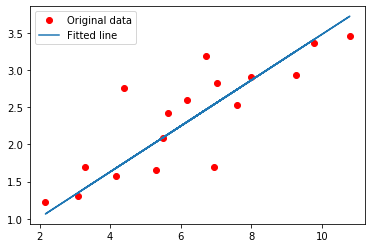

In [9]:
# Graphic display
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()